# $\varepsilon$ - Greedy Multi-Arm Bandits

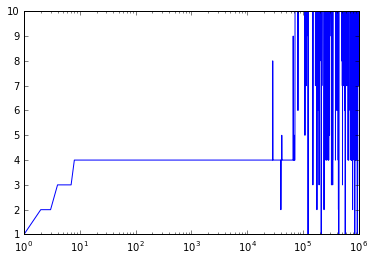

[ 0.26416704  0.14529899  0.08975951  0.29851219  0.29306404  0.57812798
  0.2877437   0.01515852  0.86511365  0.9011757 ]


In [13]:
import numpy as np



%matplotlib inline

class EpsilonGreedy_Strategy(object):
    def __init__(self,k,eps):
        self.k=k
        self.Q=np.zeros(k)
        self.N=np.zeros(k)
        self.eps=eps
        
    def update(self,R,a):
        self.N[a]+=1
        self.Q[a]=self.Q[a]+(1./self.N[a])*(R-self.Q[a])
    
    def choose_action(self):
        if np.random.rand()<1-self.eps:
            return self.Q.argmax()
        else:
            return np.random.randint(0,k)

        
if __name__=="__main__":
    import matplotlib.pyplot as plt
    
    k=10
    R=(np.array(range(k)))/float(k)
    
    def bandit_k(a,R):
        return np.random.randn()+R[a]
    
    player_1=EpsilonGreedy_Strategy(k,1e-4)
    T=int(1e6)
    A_player_1=np.zeros(T)

    for i in xrange(0,T):
        
        A=player_1.choose_action()
        A_player_1[i]=A
        R_out=bandit_k(A,R)
        player_1.update(R_out,A)
        
    plt.semilogx(A_player_1+1)
    plt.show()
    print player_1.Q


In [12]:
R

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])